In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from MongoUtils import *
from SqlUtils import *
import matplotlib.pyplot as plt
import numpy as np
import time

def run_tests(database, faker, num_tests, test_function_mongo, test_function_postgres, insertData):
    total_times = []

    for _ in range(num_tests):
        start_time = 0

        if database == 'mongo':
            mongoFaker = MongoUtils(faker)
            mongoFaker.clean_database()
            if insertData:
                mongoFaker.insert_documents()
            start_time = time.time()
            test_function_mongo(mongoFaker)
        elif database == 'postgres':
            sqlUtils = SqlUtils(faker)
            sqlUtils.clean_database()
            if insertData:
                sqlUtils.insert_faker_data()
            start_time = time.time()
            test_function_postgres(sqlUtils)
        else:
            raise ValueError("Invalid database type")
        elapsed_time = time.time() - start_time
        total_times.append(elapsed_time)

    return total_times

def plot_results(mongo_results, postgres_results, title):
    fig, ax = plt.subplots()
    ax.boxplot(mongo_results, positions=np.arange(len(num_sessions_list))*2-0.4, widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.boxplot(postgres_results, positions=np.arange(len(num_sessions_list))*2+0.4, widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

    ax.set_xticks(np.arange(len(num_sessions_list))*2)
    ax.set_xticklabels([str(num) for num in num_sessions_list])
    ax.set_xlabel('Number of Sessions Inserted')
    ax.set_ylabel('Execution Time (seconds), logarithmic scale')
    ax.set_title(title)
    plt.yscale('log')

    # Add legend
    legend_labels = ['Left: MongoDB', 'Right: PostgreSQL']
    legend_colors = ['lightblue', 'lightgreen']
    legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
    ax.legend(legend_patches, legend_labels)

    plt.show()

def read_with_filter_test_mongo(mongoFaker):
    x = mongoFaker.find_by_session_length(1)
    
def read_with_filter_test_postgres(sqlUtils):
    x = sqlUtils.find_all_by_session_length(1)

def write_test_mongo(mongoFaker):
    mongoFaker.insert_documents()
    
def write_test_postgres(sqlUtils):
    sqlUtils.insert_faker_data()

def read_all_mongo(mongoFaker):
    return mongoFaker.find_all()

def read_all_postgres(sqlUtils):
    return sqlUtils.find_all()

def read_with_filter_projection_mongo(mongoFaker):
    return mongoFaker.find_by_session_length_projection(1)

def read_with_filter_projection_postgres(sqlUtils):
    return sqlUtils.find_by_session_length_projection(1)

def read_with_filter_projection_sort_mongo(mongoFaker):
    return mongoFaker.find_by_session_length_projection_sort(1)

def read_with_filter_projection_sort_postgres(sqlUtils):
    return sqlUtils.find_by_session_length_projection_sort(1)

def update_all_mongo(mongoFaker):
    mongoFaker.update_session_length()

def update_all_postgres(sqlUtils):
    sqlUtils.update_session_length()

def update_where_mongo(mongoFaker):
    mongoFaker.update_session_length_by_length(1)

def update_where_postgres(sqlUtils):
    sqlUtils.update_session_length_by_length(1)

def delete_all_mongo(mongoFaker):
    mongoFaker.delete_all()

def delete_all_postgres(sqlUtils):
    sqlUtils.delete_all()

tests = [(write_test_mongo, write_test_postgres, "Write Performance Comparison: MongoDB vs PostgreSQL", False),
         #(read_all_mongo, read_all_postgres, "Read All Performance Comparison: MongoDB vs PostgreSQL", True),
         #(read_with_filter_test_mongo, read_with_filter_test_postgres, 'Read With Filter Performance Comparison: MongoDB vs PostgreSQL', True),
         #(read_with_filter_projection_mongo, read_with_filter_projection_postgres, "Read With Filter & Projection Performance Comparison: MongoDB vs PostgreSQL", True),
         #(read_with_filter_projection_sort_mongo, read_with_filter_projection_sort_postgres, "Read With Filter, Projection & Sort Performance Comparison: MongoDB vs PostgreSQL", True),
         #(update_all_mongo, update_all_postgres, "Update All Performance Comparison: MongoDB vs PostgreSQL", True),
         #(update_where_mongo, update_where_postgres, "Update with Filter Performance Comparison: MongoDB vs PostgreSQL", True),
         #(delete_all_mongo, delete_all_postgres, "Delete All Performance Comparison: MongoDB vs PostgreSQL", True)
        ]

num_sessions_list = [10, 100, 1000, 10000]
num_tests = 10

for test in tests:
    print("Running test: " + test[2])
    mongo_results = []
    postgres_results = []
    for num_sessions in num_sessions_list:
        print("Running for " + str(num_sessions))
        faker = DataFaker(5, 10, num_sessions, 100, 2, 5, 10)

        times_mongo = run_tests('mongo', faker, num_tests, test[0], test[1], test[3])
        mongo_results.append(times_mongo)
        times_postgres = run_tests('postgres', faker, num_tests, test[0], test[1], test[3])
        postgres_results.append(times_postgres)

    # Plot results
    plot_results(mongo_results, postgres_results, test[2])

Running test: Write Performance Comparison: MongoDB vs PostgreSQL
Running for 10
Running for 100


KeyboardInterrupt: 

Running for 10
Running for 100
Running for 1000
Running for 10000


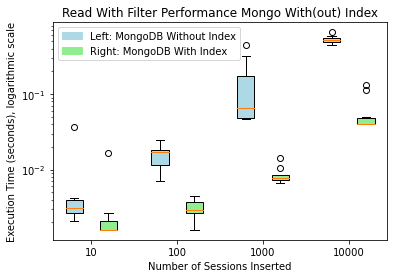

In [19]:
# Indexing Test

test = (read_with_filter_test_mongo, read_with_filter_test_postgres, 'Read With Filter Performance Comparison: MongoDB vs PostgreSQL', True)


without_index = [[0.03675413131713867, 0.0032148361206054688, 0.002646923065185547, 0.0034804344177246094, 0.004194974899291992, 0.002644777297973633, 0.003051280975341797, 0.002618074417114258, 0.0021212100982666016, 0.004152536392211914], [0.017447710037231445, 0.0185396671295166, 0.016596078872680664, 0.013623714447021484, 0.024375200271606445, 0.01723170280456543, 0.011016607284545898, 0.007009029388427734, 0.021129608154296875, 0.010144948959350586], [0.11025476455688477, 0.058759450912475586, 0.0485842227935791, 0.04772520065307617, 0.048201799392700195, 0.04698061943054199, 0.4479818344116211, 0.19554448127746582, 0.3186533451080322, 0.07147049903869629], [0.5492751598358154, 0.5567548274993896, 0.660921573638916, 0.5157301425933838, 0.5221428871154785, 0.4780879020690918, 0.4484214782714844, 0.5807690620422363, 0.5243608951568604, 0.4870336055755615]]
with_index = []
for num_sessions in num_sessions_list:
    print("Running for " + str(num_sessions))
    faker = DataFaker(5, 10, num_sessions, 100, 2, 5, 10)

    times_mongo = run_tests('mongo', faker, num_tests, test[0], test[1], test[3])
    with_index.append(times_mongo)

fig, ax = plt.subplots()
ax.boxplot(without_index, positions=np.arange(len(num_sessions_list))*2-0.4, widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax.boxplot(with_index, positions=np.arange(len(num_sessions_list))*2+0.4, widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

ax.set_xticks(np.arange(len(num_sessions_list))*2)
ax.set_xticklabels([str(num) for num in num_sessions_list])
ax.set_xlabel('Number of Sessions Inserted')
ax.set_ylabel('Execution Time (seconds), logarithmic scale')
ax.set_title("Read With Filter Performance Mongo With(out) Index")
plt.yscale('log')

# Add legend
legend_labels = ['Left: MongoDB Without Index', 'Right: MongoDB With Index']
legend_colors = ['lightblue', 'lightgreen']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels)

plt.show()

In [ ]:
# Aggregate Test
def aggregate_mongo(mongoFaker):
    mongoFaker.aggregate()
    
def aggregate_postgres(sqlUtils):
    sqlUtils.group_by()

test = (aggregate_mongo, aggregate_postgres, '', True)

mongo_results = []
postgres_results = []
for num_sessions in num_sessions_list:
    print("Running for " + str(num_sessions))
    faker = DataFaker(5, 10, num_sessions, 100, 2, 5, 10)

    times_mongo = run_tests('mongo', faker, num_tests, test[0], test[1], test[3])
    mongo_results.append(times_mongo)
    times_postgres = run_tests('postgres', faker, num_tests, test[0], test[1], test[3])
    postgres_results.append(times_postgres)

fig, ax = plt.subplots()
ax.boxplot(mongo_results, positions=np.arange(len(num_sessions_list))*2-0.4, widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax.boxplot(postgres_results, positions=np.arange(len(num_sessions_list))*2+0.4, widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

ax.set_xticks(np.arange(len(num_sessions_list))*2)
ax.set_xticklabels([str(num) for num in num_sessions_list])
ax.set_xlabel('Number of Sessions Inserted')
ax.set_ylabel('Execution Time (seconds), logarithmic scale')
ax.set_title("Aggregate Performance Comparison MongoDb vs PostgreSQL")
plt.yscale('log')

# Add legend
legend_labels = ['Left: MongoDB', 'Right: PostgreSQL']
legend_colors = ['lightblue', 'lightgreen']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels)

plt.show()

Running test: Write Performance Comparison: MongoDB vs MongoDB with References
Running for 10
Running for 100
Running for 1000
Running for 10000


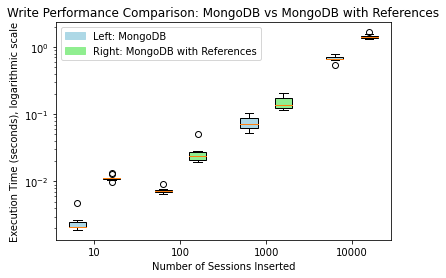

Running test: Read All Performance Comparison: MongoDB vs MongoDB with References
Running for 10
Running for 100
Running for 1000
Running for 10000


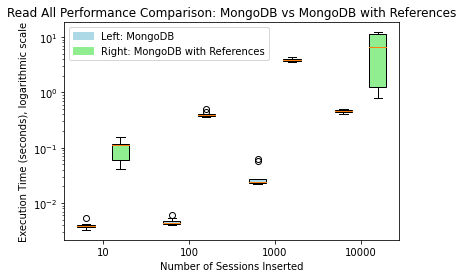

Running test: Read With Filter Performance Comparison: MongoDB vs MongoDB with References
Running for 10
Running for 100
Running for 1000
Running for 10000


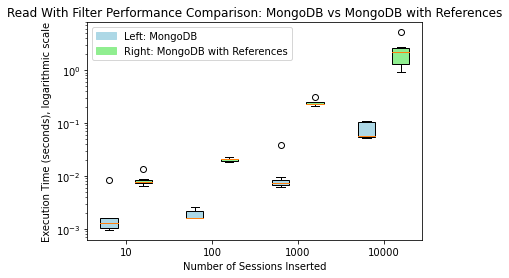

In [3]:
# Reference tests
# run the first cell of the notebook shortly before running this
from MongoUtilsRef import *

def run_tests(database, faker, num_tests, test_function_mongo, test_function_reference, insertData):
    total_times = []

    for _ in range(num_tests):
        start_time = 0

        if database == 'mongo':
            mongoFaker = MongoUtils(faker)
            mongoFaker.clean_database()
            if insertData:
                mongoFaker.insert_documents()
            start_time = time.time()
            test_function_mongo(mongoFaker)
        elif database == 'reference':
            mongoFaker = MongoUtilsRef(faker)
            mongoFaker.clean_database()
            if insertData:
                mongoFaker.insert_documents()
            start_time = time.time()
            test_function_reference(mongoFaker)
        else:
            raise ValueError("Invalid database type")
        elapsed_time = time.time() - start_time
        total_times.append(elapsed_time)

    return total_times

def plot_results(mongo_results, postgres_results, title):
    fig, ax = plt.subplots()
    ax.boxplot(mongo_results, positions=np.arange(len(num_sessions_list))*2-0.4, widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.boxplot(postgres_results, positions=np.arange(len(num_sessions_list))*2+0.4, widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

    ax.set_xticks(np.arange(len(num_sessions_list))*2)
    ax.set_xticklabels([str(num) for num in num_sessions_list])
    ax.set_xlabel('Number of Sessions Inserted')
    ax.set_ylabel('Execution Time (seconds), logarithmic scale')
    ax.set_title(title)
    plt.yscale('log')

    # Add legend
    legend_labels = ['Left: MongoDB', 'Right: MongoDB with References']
    legend_colors = ['lightblue', 'lightgreen']
    legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
    ax.legend(legend_patches, legend_labels)

    plt.show()

def write_test_reference(mongoFakerRef):
    mongoFakerRef.insert_documents()

def read_all_reference(mongoFakerRef):
    mongoFakerRef.find_all()

def read_with_filter_reference(mongoFakerRef):
    mongoFakerRef.find_by_session_length(1)

tests = [(write_test_mongo, write_test_reference, "Write Performance Comparison: MongoDB vs MongoDB with References", False),
         (read_all_mongo, read_all_reference, "Read All Performance Comparison: MongoDB vs MongoDB with References", True),
         (read_with_filter_test_mongo, read_with_filter_reference, 'Read With Filter Performance Comparison: MongoDB vs MongoDB with References', True),
         #(read_with_filter_projection_mongo, read_with_filter_projection_postgres, "Read With Filter & Projection Performance Comparison: MongoDB vs PostgreSQL", True),
         #(read_with_filter_projection_sort_mongo, read_with_filter_projection_sort_postgres, "Read With Filter, Projection & Sort Performance Comparison: MongoDB vs PostgreSQL", True),
         #(update_all_mongo, update_all_postgres, "Update All Performance Comparison: MongoDB vs PostgreSQL", True),
         #(update_where_mongo, update_where_postgres, "Update with Filter Performance Comparison: MongoDB vs PostgreSQL", True),
         #(delete_all_mongo, delete_all_postgres, "Delete All Performance Comparison: MongoDB vs PostgreSQL", True)
        ]

num_sessions_list = [10, 100, 1000, 10000]
num_tests = 10

for test in tests:
    print("Running test: " + test[2])
    mongo_results = []
    reference_results = []
    for num_sessions in num_sessions_list:
        print("Running for " + str(num_sessions))
        faker = DataFaker(5, 10, num_sessions, 100, 2, 5, 10)

        times_mongo = run_tests('mongo', faker, num_tests, test[0], test[1], test[3])
        mongo_results.append(times_mongo)
        times_reference = run_tests('reference', faker, num_tests, test[0], test[1], test[3])
        reference_results.append(times_reference)

    # Plot results
    plot_results(mongo_results, reference_results, test[2])
